# Netflix Userbase Analysis

In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [166]:
# importing dataset

In [167]:
df = pd.read_csv(r'C:\Users\mdnan\Data Science\Project\EDA project\Netflix Userbase.csv')

In [168]:
df.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month


In [169]:
df.shape

(2500, 10)

In [170]:
df.nunique()

User ID              2500
Subscription Type       3
Monthly Revenue         6
Join Date             300
Last Payment Date      26
Country                10
Age                    26
Gender                  2
Device                  4
Plan Duration           1
dtype: int64

In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   User ID            2500 non-null   int64 
 1   Subscription Type  2500 non-null   object
 2   Monthly Revenue    2500 non-null   int64 
 3   Join Date          2500 non-null   object
 4   Last Payment Date  2500 non-null   object
 5   Country            2500 non-null   object
 6   Age                2500 non-null   int64 
 7   Gender             2500 non-null   object
 8   Device             2500 non-null   object
 9   Plan Duration      2500 non-null   object
dtypes: int64(3), object(7)
memory usage: 195.4+ KB


In [172]:
df['Join Date'] = pd.to_datetime(df['Join Date'])

In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   User ID            2500 non-null   int64         
 1   Subscription Type  2500 non-null   object        
 2   Monthly Revenue    2500 non-null   int64         
 3   Join Date          2500 non-null   datetime64[ns]
 4   Last Payment Date  2500 non-null   object        
 5   Country            2500 non-null   object        
 6   Age                2500 non-null   int64         
 7   Gender             2500 non-null   object        
 8   Device             2500 non-null   object        
 9   Plan Duration      2500 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 195.4+ KB


In [174]:
df.drop(['Plan Duration','User ID'],axis=1,inplace=True)

In [175]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Monthly Revenue,2500.0,12.5084,1.686851,10.0,11.0,12.0,14.0,15.0
Age,2500.0,38.7956,7.171778,26.0,32.0,39.0,45.0,51.0


In [176]:
df.columns

Index(['Subscription Type', 'Monthly Revenue', 'Join Date',
       'Last Payment Date', 'Country', 'Age', 'Gender', 'Device'],
      dtype='object')

In [177]:
df['Join Year'] = df['Join Date'].dt.year

In [178]:
df['Join Month'] = df['Join Date'].dt.month

In [179]:
df.head()

,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Join Year,Join Month
0,Basic,10,2022-01-15,10-06-23,United States,28,Male,Smartphone,2022,1
1,Premium,15,2021-05-09,22-06-23,Canada,35,Female,Tablet,2021,5
2,Standard,12,2023-02-28,27-06-23,United Kingdom,42,Male,Smart TV,2023,2
3,Standard,12,2022-10-07,26-06-23,Australia,51,Female,Laptop,2022,10
4,Basic,10,2023-01-05,28-06-23,Germany,33,Male,Smartphone,2023,1


In [180]:
df.shape

(2500, 10)

In [181]:
def quarter(date):
    if 1<= date.month <=3:
        return 'Q1'
    elif 4<= date.month <=6:
        return 'Q2'
    elif 7<= date.month <=9:
        return 'Q3'
    else:
        return 'Q4'



In [182]:
df['Joining Quarter'] = df['Join Date'].apply(quarter)

In [183]:
df.head()

,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Join Year,Join Month,Joining Quarter
0,Basic,10,2022-01-15,10-06-23,United States,28,Male,Smartphone,2022,1,Q1
1,Premium,15,2021-05-09,22-06-23,Canada,35,Female,Tablet,2021,5,Q2
2,Standard,12,2023-02-28,27-06-23,United Kingdom,42,Male,Smart TV,2023,2,Q1
3,Standard,12,2022-10-07,26-06-23,Australia,51,Female,Laptop,2022,10,Q4
4,Basic,10,2023-01-05,28-06-23,Germany,33,Male,Smartphone,2023,1,Q1


In [184]:
df.shape

(2500, 11)

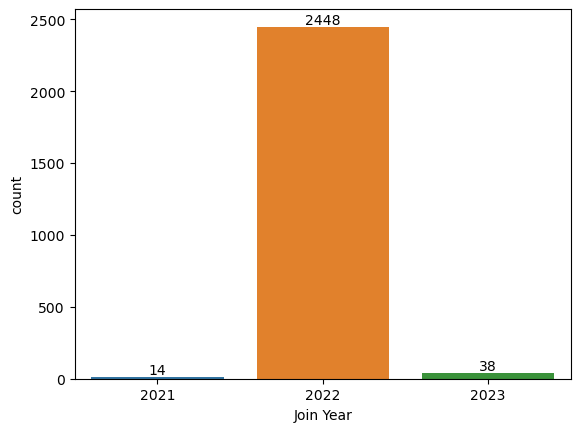

In [185]:
ax = sns.countplot(x='Join Year',data=df)

for bars in ax.containers:
    ax.bar_label(bars)

In [186]:
df = df[df['Join Year']==2022]

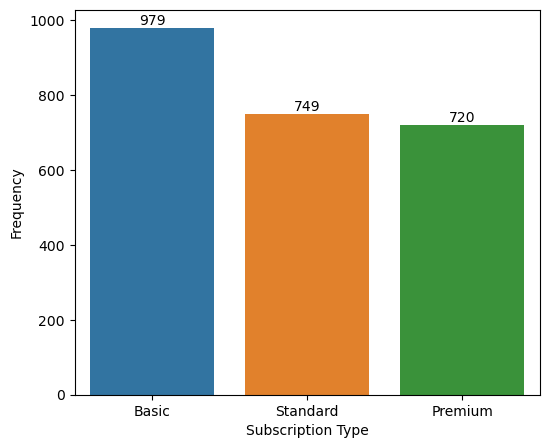

In [187]:
plt.figure(figsize=(6,5))
ax = sns.countplot(x='Subscription Type', data=df)
ax.set_ylabel('Frequency')

for bars in ax.containers:
    ax.bar_label(bars)
    

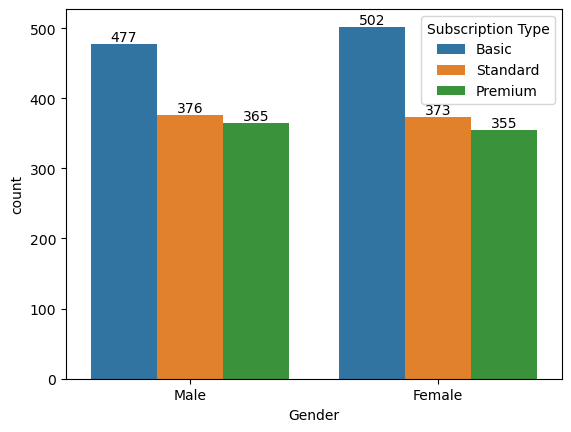

In [188]:
ax = sns.countplot(x='Gender',data=df,hue='Subscription Type')

for bars in ax.containers:
    ax.bar_label(bars)

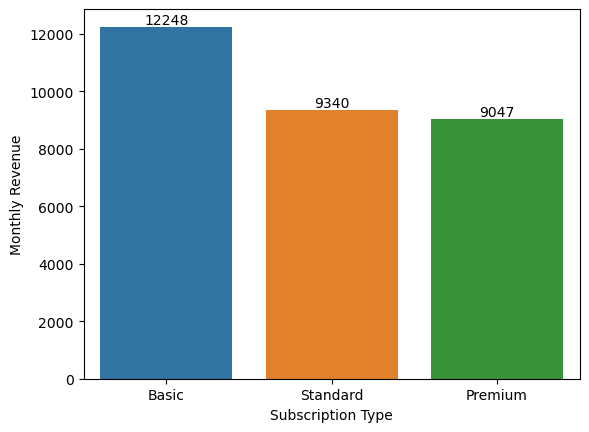

In [189]:
Revenue_by_type = df.groupby('Subscription Type',as_index=False)['Monthly Revenue'].sum().sort_values('Monthly Revenue',ascending=False)

ax = sns.barplot(x='Subscription Type',y='Monthly Revenue',data=Revenue_by_type)

for bars in ax.containers:
    ax.bar_label(bars)

In [190]:
df.columns

Index(['Subscription Type', 'Monthly Revenue', 'Join Date',
       'Last Payment Date', 'Country', 'Age', 'Gender', 'Device', 'Join Year',
       'Join Month', 'Joining Quarter'],
      dtype='object')

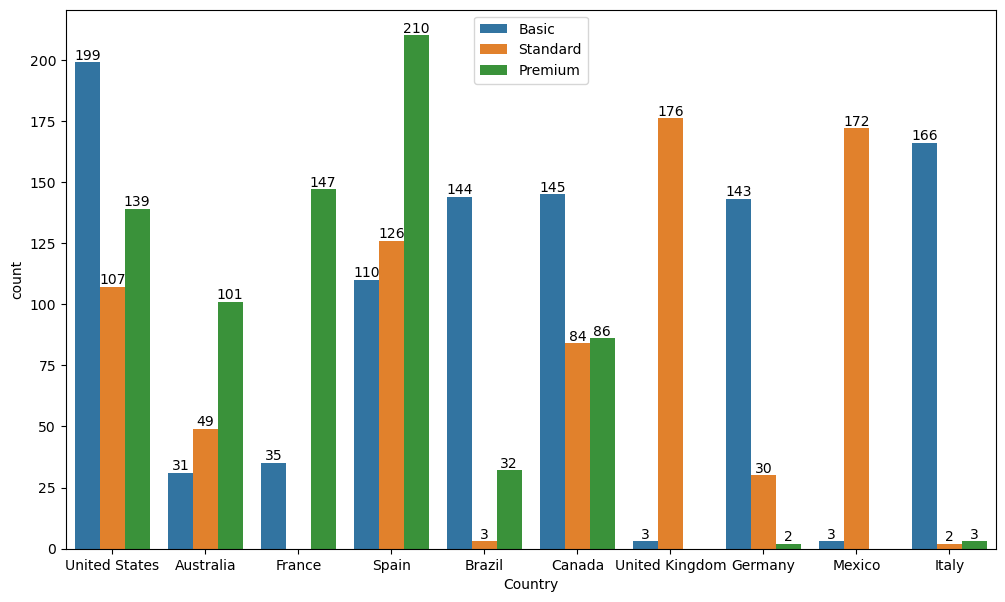

In [191]:
plt.figure(figsize=(12,7))
ax = sns.countplot(x='Country',data=df,hue='Subscription Type')
ax.legend(loc='upper center')
for bars in ax.containers:
    ax.bar_label(bars)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


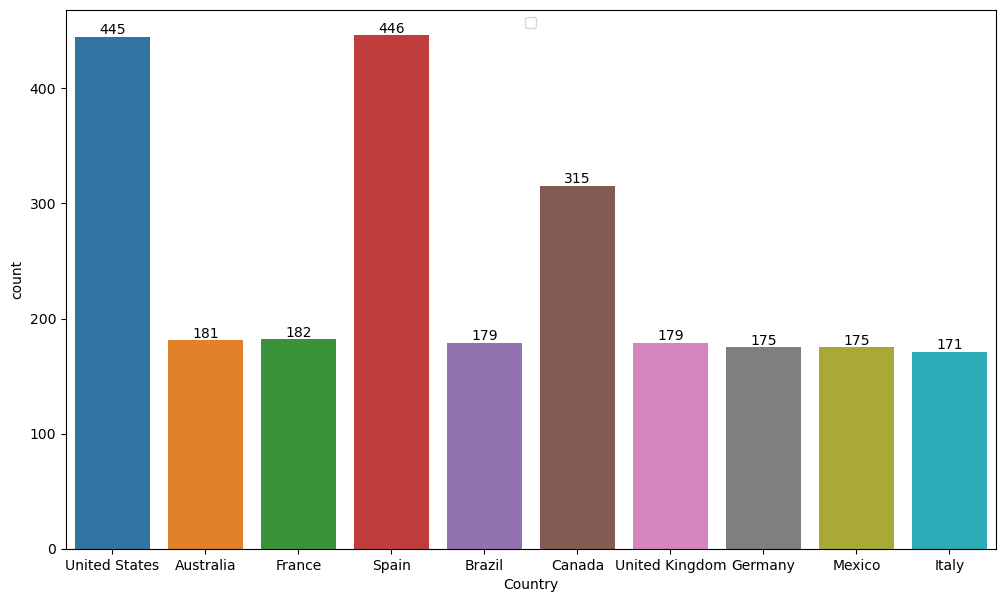

In [192]:
plt.figure(figsize=(12,7))
ax = sns.countplot(x='Country',data=df)
ax.legend(loc='upper center')
for bars in ax.containers:
    ax.bar_label(bars)

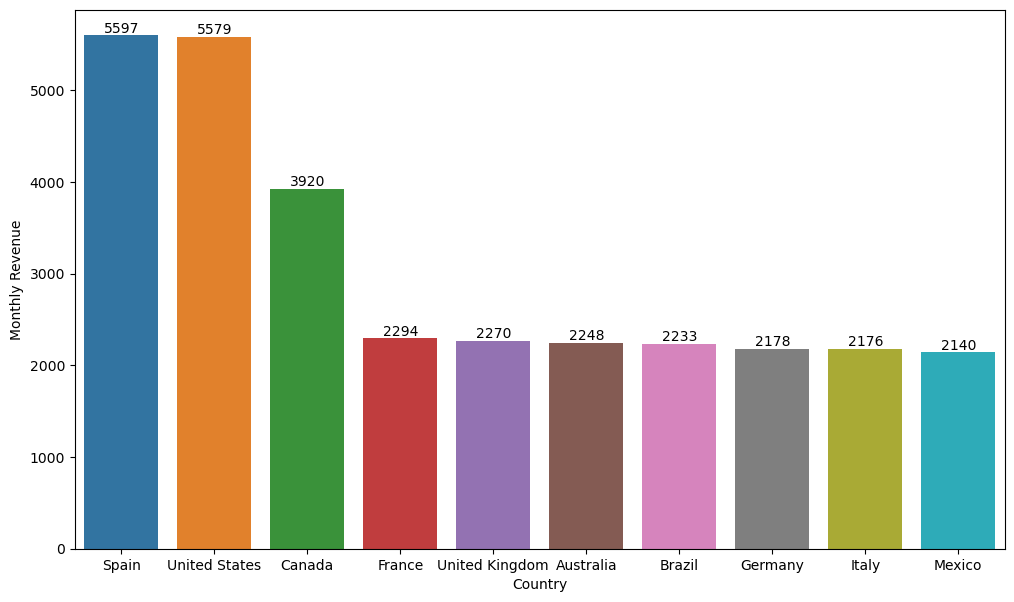

In [193]:
plt.figure(figsize=(12,7))
revenue_by_country = df.groupby('Country',as_index=False)['Monthly Revenue'].sum().sort_values('Monthly Revenue',ascending=False)
ax = sns.barplot(x='Country',y='Monthly Revenue',data=revenue_by_country)

for bars in ax.containers:
    ax.bar_label(bars)

In [194]:
df.columns

Index(['Subscription Type', 'Monthly Revenue', 'Join Date',
       'Last Payment Date', 'Country', 'Age', 'Gender', 'Device', 'Join Year',
       'Join Month', 'Joining Quarter'],
      dtype='object')

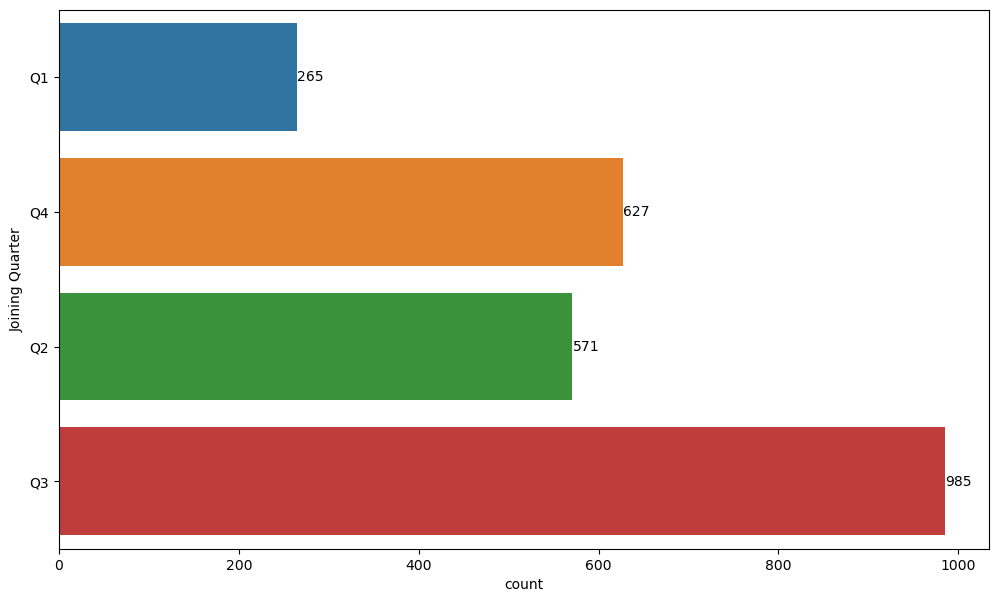

In [195]:
plt.figure(figsize=(12,7))
ax = sns.countplot(y='Joining Quarter',data=df)

for bars in ax.containers:
    ax.bar_label(bars)

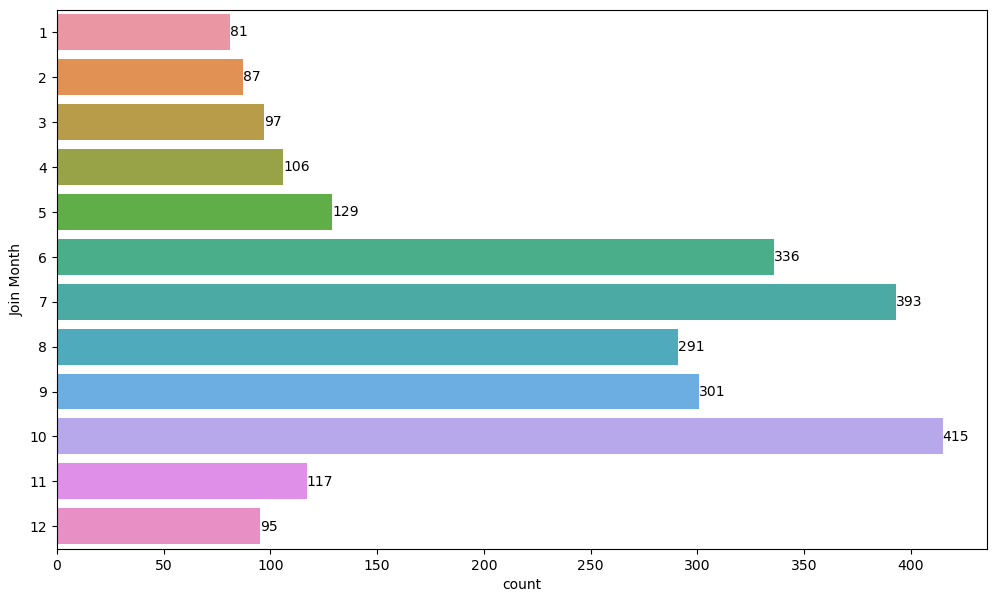

In [196]:
plt.figure(figsize=(12,7))
ax = sns.countplot(y='Join Month',data=df)

for bars in ax.containers:
    ax.bar_label(bars)

## Conclusion

1. From this graph we can conclude that most people prefer basic plan.
2. Female subscribers in basic plan are slightly higher than male’s subscriber.
3. Also revenue generating from basic subscription plan is higher than other subscriptions.
4. Spain is leading in premium subscription. Peoples in United Kingdom and Mexico prefers standard subscription. Italy's citizens prefer basic subscription plan.
5. Most of the Subscribers are from United States and Spain. And These are also highest revenue producing countries.
6. There is lowest sales in 1st quarter of the year and highest in 3rd quarter.
7. Peoples mostly subscribes between June-October. And least number of subscribers in month of January.